In [1]:
import numpy as np 
import pandas as pd
import string 
import spacy 

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [2]:
import pandas
data=pd.read_csv("apple.txt",error_bad_lines=False)

b'Skipping line 6: expected 1 fields, saw 14\n'


In [4]:
# remove both the leading and the trailing characters
data = [x.strip() for x in data.x]
# removes empty strings, because they are considered in Python as False
data = [x for x in data if x] 
data[0:5]

["It's amazing..... battery last around 10 -12 hrs.....best laptop for students and coders",
 "Finally a MacBook possession. Got it in 50k in Diwali sale. Technically good laptop.Good News.luxury product, niche technology, good battery life, reliable machine (other laptops crash and become defunct in 6-10 years), no anti-virus required, security of data and transactions much better. Terrific sense of possession & pride.Bad News. Problems will be there if you are switching from windows based system - very less space in hard disk, no CD drive, inability to transfer data from Mac to your existing external hard disc unless you format it, apps are mostly paid and re unreasonably expensive (no free apps which are available otherwise on google play store, even the angry bird costs Rs 400 !!), all printers are not compatible (e.g. the most economical MFD laser printer RICOH SP 111 can't be used), huge compatibility issues with Pages (MS Word) and Keynote (powerpoint) unless you master it by wo

In [6]:
#Part Of Speech Tagging
nlp = spacy.load('en_core_web_sm')
one_block = data[2]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [7]:
one_block

"Best Laptop under 60k. If you don't want any accounting softwares like tally or busy then go for it, better than windows in every term. I just love it's battery life with sleek look 😍Now talking about MS officeIt's available on app store, free for 1 monthAfter that you will have to pay.You cannot install pirated version but if you install Windows 7 or any other version then u can use Ms office for freeBut in MacBook there are other apps which are good substitute for Ms office appsNumbers for ExcelPages for wordKeynote for PowerPointAnd you can convert your numbers file to Excel file or csv fileSame for the pages & keynoteSo no need of Ms office for me.Cons1. U cannot play games, your laptop will just heat up, battery will drain* U cannot play pubg mobile on emulator if you are pubg lover😁2. Storage 128gb, it will work fine but if you want to store movies or TV shows u can't, u have to buy external hard disk"

In [8]:
for token in doc_block[0:20]:
    print(token, token.pos_)

Best PROPN
Laptop PROPN
under ADP
60k NUM
. PUNCT
If SCONJ
you PRON
do AUX
n't PART
want VERB
any DET
accounting NOUN
softwares NOUN
like ADP
tally NOUN
or CCONJ
busy ADJ
then ADV
go VERB
for ADP


In [9]:
#Filtering for nouns and verbs only
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs[5:25])

['windows', 'term', 'love', 'battery', 'life', 'look', 'talking', 'app', 'store', 'monthAfter', 'have', 'pay', 'install', 'pirated', 'version', 'install', 'version', 'u', 'use', 'office']


In [10]:
#Counting tokens again
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']

wf_df[0:10]

,word,count
0,office,3
1,are,3
2,want,2
3,battery,2
4,store,2
5,have,2
6,install,2
7,version,2
8,file,2
9,play,2


<AxesSubplot:title={'center':'Top verbs and nouns'}, xlabel='word'>

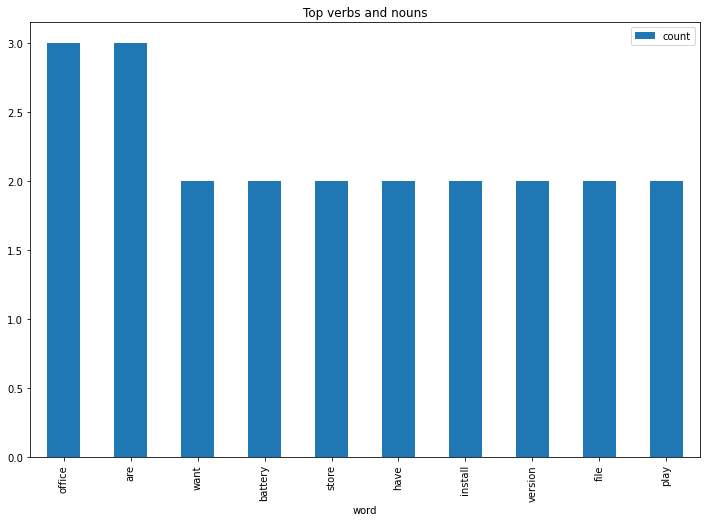

In [11]:
#Visualizing results
#Barchart for top 10 nouns + verbs
wf_df[0:10].plot.bar(x='word', figsize=(12,8), title='Top verbs and nouns')

In [12]:
#Sentiment analysis
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [13]:
# redefing data bcz after joining we cant perform sentiment analysis :
data=pd.read_csv("apple.txt",error_bad_lines=False)
data = [x.strip() for x in data.x] # remove both the leading and the trailing characters
data = [x for x in data if x] # removes empty strings, because they are considered in Python as False

b'Skipping line 6: expected 1 fields, saw 14\n'


In [15]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(data))
sentences[0:5]

["It's amazing..... battery last around 10 -12 hrs.....best laptop for students and coders Finally a MacBook possession.",
 'Got it in 50k in Diwali sale.',
 'Technically good laptop.Good News.luxury product, niche technology, good battery life, reliable machine (other laptops crash and become defunct in 6-10 years), no anti-virus required, security of data and transactions much better.',
 'Terrific sense of possession & pride.Bad News.',
 'Problems will be there if you are switching from windows based system - very less space in hard disk, no CD drive, inability to transfer data from Mac to your existing external hard disc unless you format it, apps are mostly paid and re unreasonably expensive (no free apps which are available otherwise on google play store, even the angry bird costs Rs 400 !!']

In [17]:
# make data frame for sentences :
sent_df = pd.DataFrame(sentences, columns = ["sentence"])
print(sent_df.shape)   # (53,1)
sent_df.head()

(187, 1)


,sentence
0,It's amazing..... battery last around 10 -12 h...
1,Got it in 50k in Diwali sale.
2,Technically good laptop.Good News.luxury produ...
3,Terrific sense of possession & pride.Bad News.
4,Problems will be there if you are switching fr...


In [21]:

from itertools import islice
def take(n, iterable):
    return list(islice(iterable, n))
affinity_score = afinn.set_index('word').value.to_dict()
take(10, affinity_score.items())

[('abandon', -2),
 ('abandoned', -2),
 ('abandons', -2),
 ('abducted', -2),
 ('abduction', -2),
 ('abductions', -2),
 ('abhor', -3),
 ('abhorred', -3),
 ('abhorrent', -3),
 ('abhors', -3)]

In [22]:
# define function to calculate sentiment score :
sentiment_lexicon = affinity_score
def calculate_sentiment(text: str = None) -> float:
    sent_score = 0
    if text :
        sentence = nlp(text)
        for word in sentence :
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [24]:
# apply calculate sentiment function on Tweets :
sent_df["sentiment_value"] = sent_df["sentence"].apply(calculate_sentiment)
sent_df.head(20)

,sentence,sentiment_value
0,It's amazing..... battery last around 10 -12 h...,7
1,Got it in 50k in Diwali sale.,0
2,Technically good laptop.Good News.luxury produ...,5
3,Terrific sense of possession & pride.Bad News.,4
4,Problems will be there if you are switching fr...,-11
5,"), all printers are not compatible (e.g.",0
6,the most economical MFD laser printer RICOH SP...,1
7,you need to spend extra for an external CD wri...,0
8,Mac con not be connected to most of the projec...,1
9,"you can't connect it to your TV, the ports are...",5


In [26]:
#  make word count columns for counting words in each tweet :
sent_df["word_count"] = sent_df["sentence"].str.split().apply(len)
sent_df.head()

,sentence,sentiment_value,word_count
0,It's amazing..... battery last around 10 -12 h...,7,17
1,Got it in 50k in Diwali sale.,0,7
2,Technically good laptop.Good News.luxury produ...,5,31
3,Terrific sense of possession & pride.Bad News.,4,7
4,Problems will be there if you are switching fr...,-11,65


In [27]:
# sort by sentiment score :
sent_df.sort_values(by="sentiment_value").head()

,sentence,sentiment_value,word_count
4,Problems will be there if you are switching fr...,-11,65
148,This is the worst apple product I have ever s...,-8,74
89,"?, god damn it apple (Though its not bad, have...",-6,43
175,The device never had any accidental drop or sh...,-5,17
121,Requires power input to restart again.Contacte...,-4,22


In [53]:
# get most positive reviews :
sent_df.loc[sent_df["sentiment_value"]>15]

,sentence,sentiment_value,word_count,index,Analysis
86,"All are Gud.. For now.. Apple,apple,apple, tha...",24,184,87,Positive
151,..So now I m working with the external keyboar...,17,113,152,Positive


In [54]:
# get most negative reviews :
sent_df.loc[sent_df["sentiment_value"]<-5]

,sentence,sentiment_value,word_count,index,Analysis
4,Problems will be there if you are switching fr...,-11,65,5,Negative
89,"?, god damn it apple (Though its not bad, have...",-6,43,90,Negative
148,This is the worst apple product I have ever s...,-8,74,149,Negative


In [28]:
# statistical summary for sentiment_value :
sent_df["sentiment_value"].describe()

count    187.000000
mean       0.914439
std        3.347789
min      -11.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       24.000000
Name: sentiment_value, dtype: float64

C:\Users\mites\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

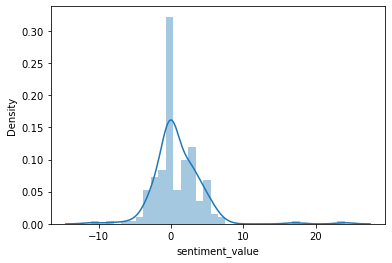

In [29]:
# visulising distribution of sentiment_value :
import seaborn as sns
sns.distplot(sent_df["sentiment_value"])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

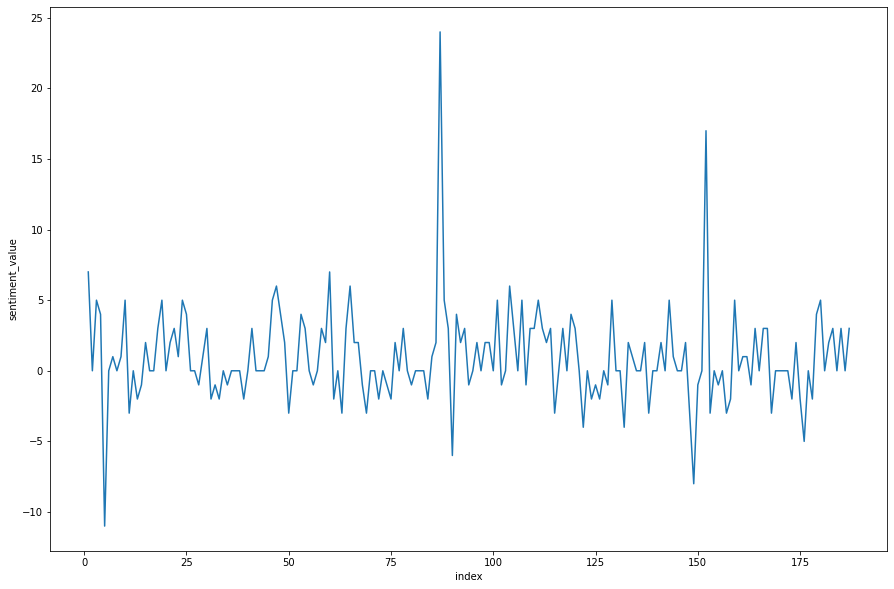

In [30]:
# line plot :
plt.figure(figsize=(15, 10))
# x = range(1,len(df["sentiment_value"])
sent_df["index"] = range(1,len(sent_df.sentiment_value)+1)
sns.lineplot(x=sent_df["index"], y=sent_df["sentiment_value"], data=sent_df)

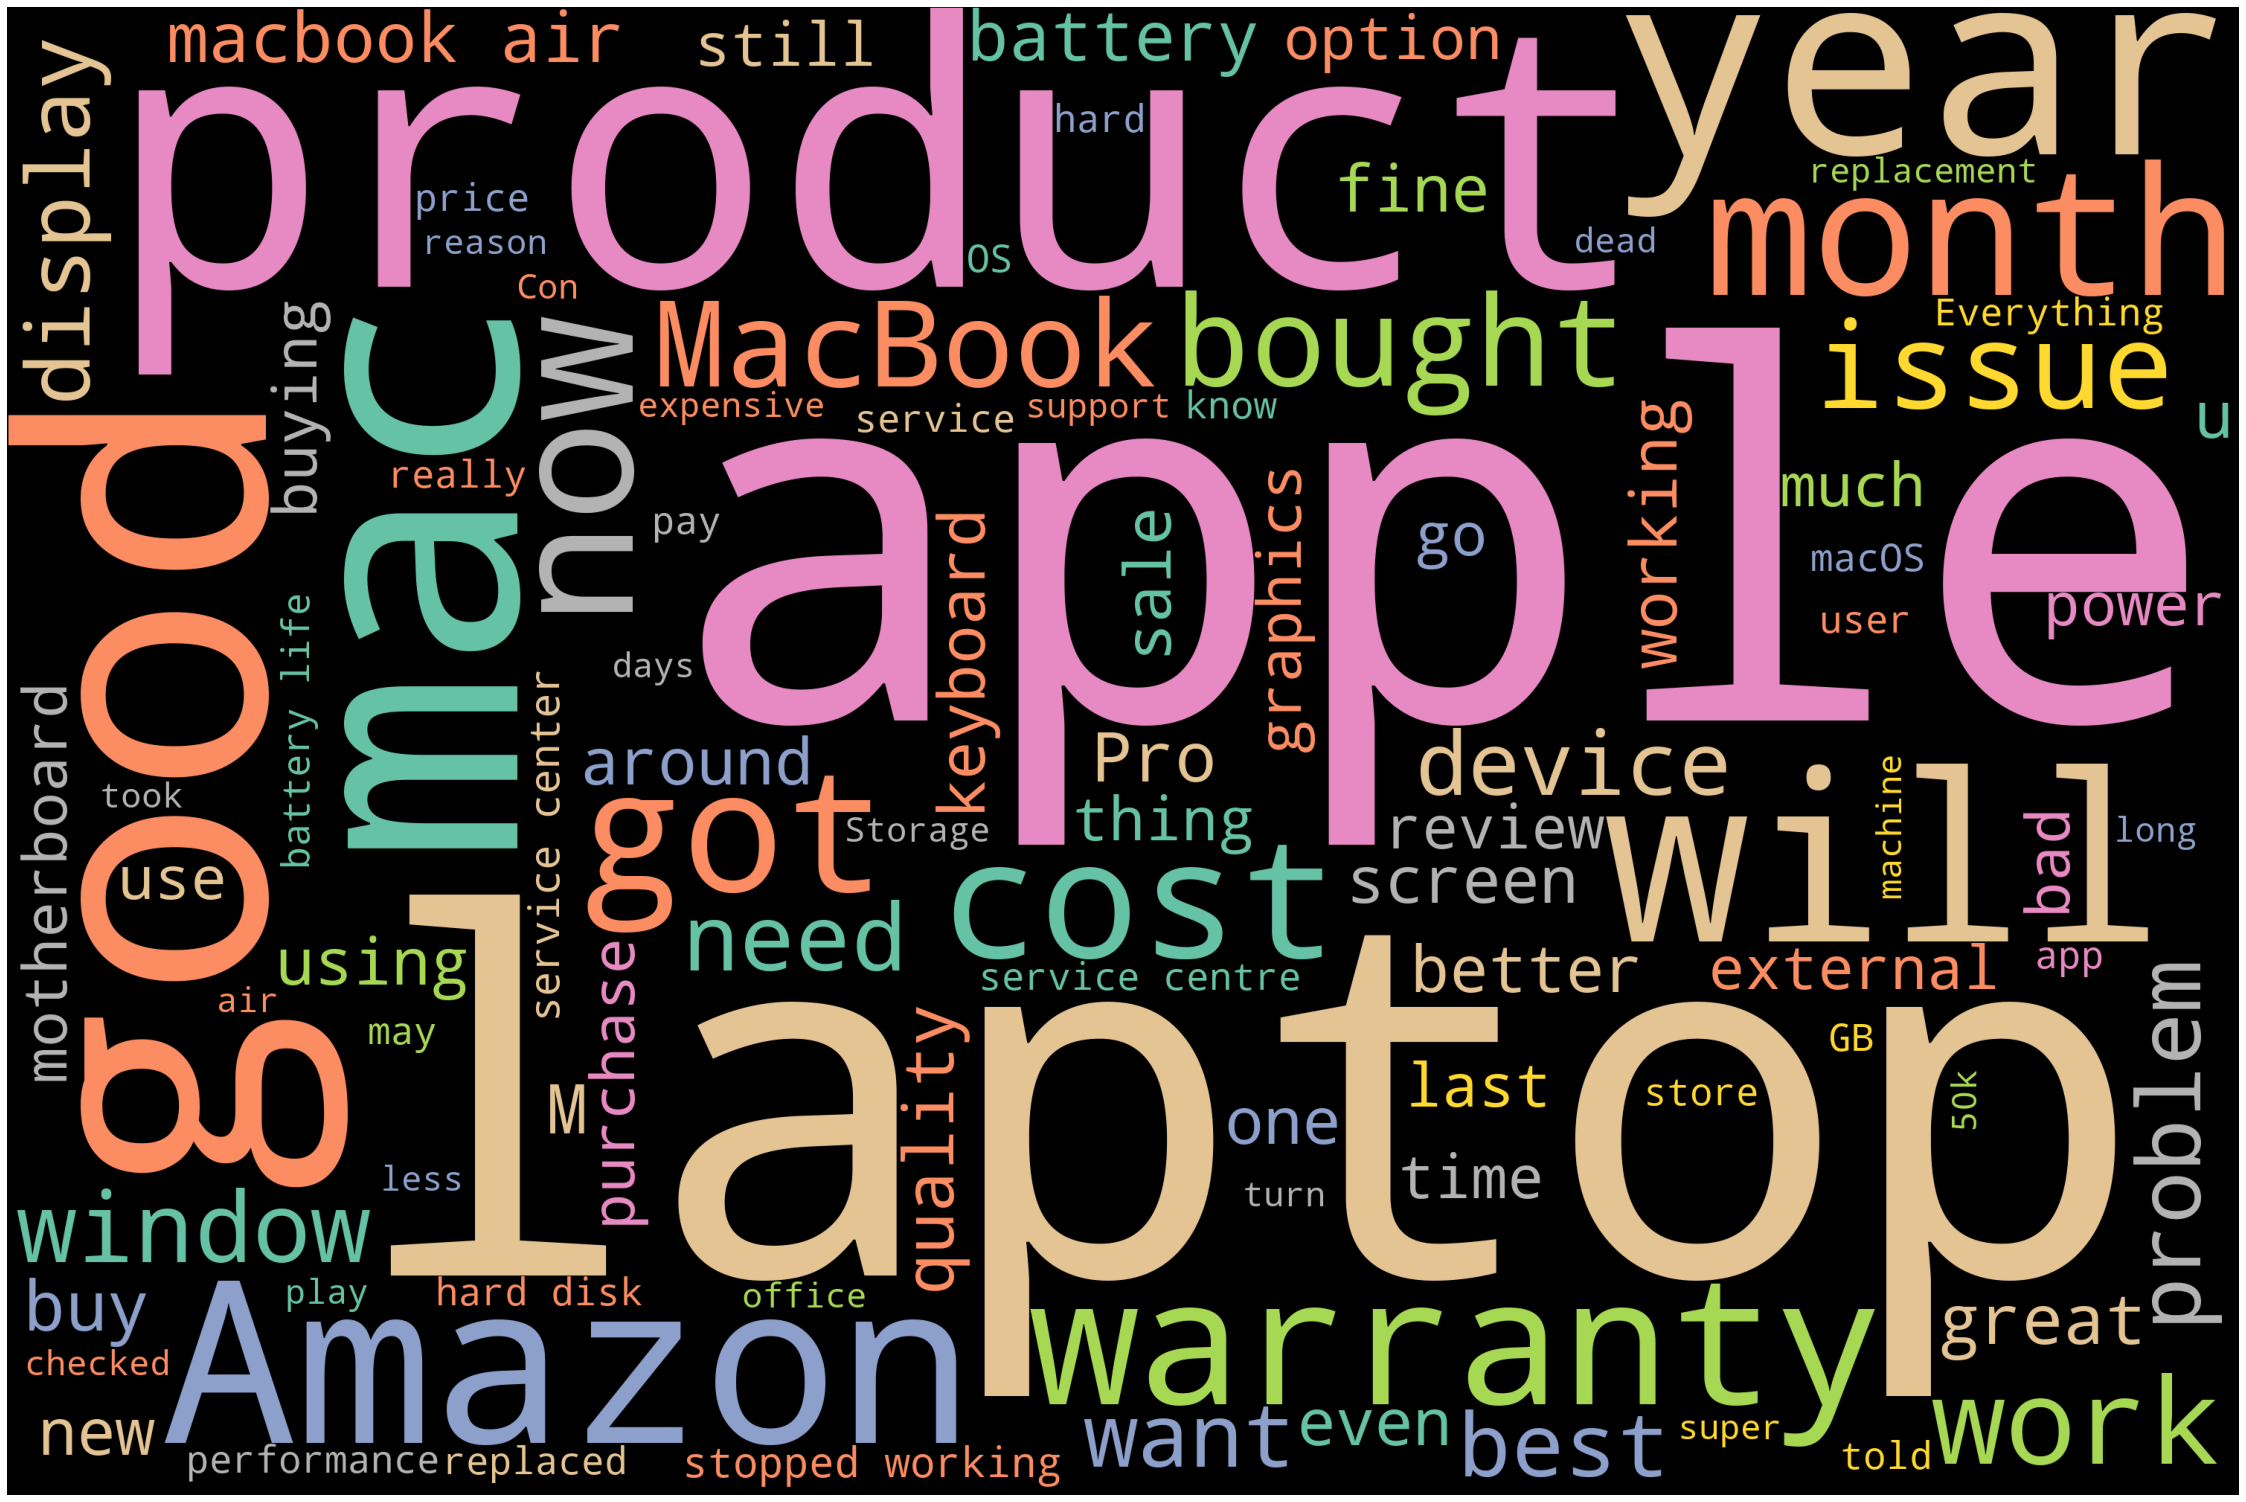

In [31]:
# word cluod representation for frequency of word :
join_text = ' '.join(data)
# Import packages
%matplotlib inline
from wordcloud import STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

stopwords = STOPWORDS
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(join_text)
# Plot
plot_cloud(wordcloud)

In [32]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
    
sent_df['Analysis'] = sent_df['sentiment_value'].apply(getAnalysis)
# Show the dataframe
sent_df.head()

,sentence,sentiment_value,word_count,index,Analysis
0,It's amazing..... battery last around 10 -12 h...,7,17,1,Positive
1,Got it in 50k in Diwali sale.,0,7,2,Neutral
2,Technically good laptop.Good News.luxury produ...,5,31,3,Positive
3,Terrific sense of possession & pride.Bad News.,4,7,4,Positive
4,Problems will be there if you are switching fr...,-11,65,5,Negative


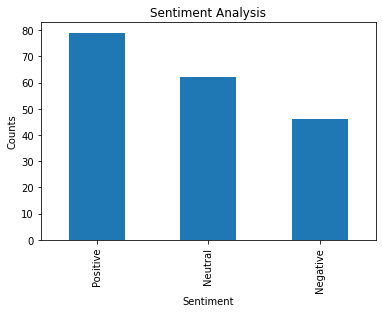

In [33]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
sent_df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()

In [34]:
# APPLYING OTHER FUNCUTIONS LIKE STEMMING, LEMMAS, COUNTERVECTORISER, BOW, TH-IDF, and removing Punctuation.
# Joining the list into one string/text
join_data = ' '.join(data)
join_data

'It\'s amazing..... battery last around 10 -12 hrs.....best laptop for students and coders Finally a MacBook possession. Got it in 50k in Diwali sale. Technically good laptop.Good News.luxury product, niche technology, good battery life, reliable machine (other laptops crash and become defunct in 6-10 years), no anti-virus required, security of data and transactions much better. Terrific sense of possession & pride.Bad News. Problems will be there if you are switching from windows based system - very less space in hard disk, no CD drive, inability to transfer data from Mac to your existing external hard disc unless you format it, apps are mostly paid and re unreasonably expensive (no free apps which are available otherwise on google play store, even the angry bird costs Rs 400 !!), all printers are not compatible (e.g. the most economical MFD laser printer RICOH SP 111 can\'t be used), huge compatibility issues with Pages (MS Word) and Keynote (powerpoint) unless you master it by worki

In [36]:
# Remove Punctuation :
no_punc_text = join_data.translate(str.maketrans('', '', string.punctuation))
no_punc_text

'Its amazing battery last around 10 12 hrsbest laptop for students and coders Finally a MacBook possession Got it in 50k in Diwali sale Technically good laptopGood Newsluxury product niche technology good battery life reliable machine other laptops crash and become defunct in 610 years no antivirus required security of data and transactions much better Terrific sense of possession  prideBad News Problems will be there if you are switching from windows based system  very less space in hard disk no CD drive inability to transfer data from Mac to your existing external hard disc unless you format it apps are mostly paid and re unreasonably expensive no free apps which are available otherwise on google play store even the angry bird costs Rs 400  all printers are not compatible eg the most economical MFD laser printer RICOH SP 111 cant be used huge compatibility issues with Pages MS Word and Keynote powerpoint unless you master it by working on these still mostly the document and slides ei

In [37]:
#Tokenization
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_punc_text)
print(text_tokens[0:50])

['Its', 'amazing', 'battery', 'last', 'around', '10', '12', 'hrsbest', 'laptop', 'for', 'students', 'and', 'coders', 'Finally', 'a', 'MacBook', 'possession', 'Got', 'it', 'in', '50k', 'in', 'Diwali', 'sale', 'Technically', 'good', 'laptopGood', 'Newsluxury', 'product', 'niche', 'technology', 'good', 'battery', 'life', 'reliable', 'machine', 'other', 'laptops', 'crash', 'and', 'become', 'defunct', 'in', '610', 'years', 'no', 'antivirus', 'required', 'security', 'of']


In [38]:
len(text_tokens)

3444

In [39]:
#Remove stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

my_stop_words = stopwords.words('english')
my_stop_words.append('the')
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:40])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mites\AppData\Roaming\nltk_data...


['Its', 'amazing', 'battery', 'last', 'around', '10', '12', 'hrsbest', 'laptop', 'students', 'coders', 'Finally', 'MacBook', 'possession', 'Got', '50k', 'Diwali', 'sale', 'Technically', 'good', 'laptopGood', 'Newsluxury', 'product', 'niche', 'technology', 'good', 'battery', 'life', 'reliable', 'machine', 'laptops', 'crash', 'become', 'defunct', '610', 'years', 'antivirus', 'required', 'security', 'data']


[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mites\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [40]:
#Noramalize the data
lower_words = [x.lower() for x in no_stop_tokens]
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:40])      # niche became nich

['it', 'amaz', 'batteri', 'last', 'around', '10', '12', 'hrsbest', 'laptop', 'student', 'coder', 'final', 'macbook', 'possess', 'got', '50k', 'diwali', 'sale', 'technic', 'good', 'laptopgood', 'newsluxuri', 'product', 'nich', 'technolog', 'good', 'batteri', 'life', 'reliabl', 'machin', 'laptop', 'crash', 'becom', 'defunct', '610', 'year', 'antiviru', 'requir', 'secur', 'data']


In [41]:
# lemmas :
doc = nlp(' '.join(no_stop_tokens))
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:25])

['its', 'amazing', 'battery', 'last', 'around', '10', '12', 'hrsb', 'laptop', 'student', 'coder', 'finally', 'MacBook', 'possession', 'Got', '50k', 'Diwali', 'sale', 'technically', 'good', 'laptopgood', 'newsluxury', 'product', 'niche', 'technology']


In [44]:
# convert wird to metrics usinf counter vectoriser :
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)
print(vectorizer.vocabulary_)
print(X.toarray()[50:100])
print(X.toarray().shape)  # (2102, 893 )

{'its': 438, 'amazing': 70, 'battery': 120, 'last': 462, 'around': 96, '10': 0, '12': 6, 'hrsb': 398, 'laptop': 455, 'student': 768, 'coder': 182, 'finally': 325, 'macbook': 493, 'possession': 616, 'got': 364, '50k': 34, 'diwali': 253, 'sale': 690, 'technically': 784, 'good': 361, 'laptopgood': 458, 'newsluxury': 545, 'product': 634, 'niche': 547, 'technology': 785, 'life': 471, 'reliable': 666, 'machine': 495, 'crash': 208, 'become': 124, 'defunct': 229, '610': 44, 'year': 887, 'antivirus': 81, 'require': 675, 'security': 703, 'datum': 220, 'transaction': 823, 'much': 535, 'well': 861, 'terrific': 790, 'sense': 709, 'pridebad': 626, 'news': 544, 'problem': 630, 'switch': 777, 'window': 868, 'base': 118, 'system': 778, 'less': 468, 'space': 743, 'hard': 378, 'disk': 248, 'cd': 168, 'drive': 258, 'inability': 412, 'transfer': 824, 'mac': 492, 'exist': 295, 'external': 307, 'disc': 246, 'unless': 831, 'format': 336, 'app': 84, 'mostly': 529, 'pay': 592, 'unreasonably': 832, 'expensive': 

In [45]:
print(vectorizer.get_feature_names()[50:100])

['9th', 'able', 'accidental', 'accounting', 'act', 'adapt', 'add', 'adding', 'additionaly', 'advantage', 'affordable', 'after', 'again', 'againcontacte', 'ahead', 'air', 'all', 'almost', 'along', 'also', 'amazing', 'amazingnice', 'amazon', 'amazoni', 'among', 'and', 'android', 'angle', 'angry', 'another', 'answer', 'antivirus', 'anyone', 'anything', 'app', 'appario', 'apple', 'appleappleapple', 'apples', 'application', 'apprehensive', 'appropriate', 'apps', 'appsnumber', 'april', 'arenot', 'around', 'ask', 'aspect', 'atleast']


In [48]:
# for bigram and trigram :
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features = 100)
bow_matrix_ngram =vectorizer_ngram_range.fit_transform(data)
print(vectorizer_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['about', 'after', 'air', 'all', 'am', 'amazon', 'an', 'and', 'any', 'apple', 'are', 'around', 'as', 'at', 'battery', 'be', 'best', 'better', 'bought', 'but', 'buy', 'can', 'cost', 'display', 'even', 'external', 'fine', 'for', 'from', 'get', 'good', 'got', 'great', 'hard', 'have', 'if', 'if you', 'if you are', 'in', 'is', 'is not', 'issues', 'it', 'it is', 'its', 'just', 'keyboard', 'laptop', 'like', 'mac', 'macbook', 'macbook air', 'me', 'months', 'my', 'need', 'no', 'not', 'now', 'of', 'of the', 'on', 'on this', 'one', 'only', 'or', 'other', 'product', 'quality', 'sale', 'screen', 'service', 'service center', 'so', 'some', 'still', 'stopped', 'that', 'the', 'then', 'they', 'this', 'to', 'using', 'very', 'want', 'want to', 'warranty', 'was', 'which', 'while', 'will', 'windows', 'with', 'working', 'would', 'year', 'years', 'you', 'you are']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 1 8 1]
 [1 0 0 ... 0 7 1]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 3 0]
 [0 0 0 ... 0 0 0]]


In [50]:
# TF_IDF vectoriser :
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 500)
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(data)
print(vectorizer_n_gram_max_features.get_feature_names())
print(tf_idf_matrix_n_gram_max_features.toarray())

['10', '12', '2017', '4k', '50k', 'about', 'about the', 'above', 'after', 'after using', 'again', 'air', 'all', 'also', 'am', 'amazing', 'amazon', 'an', 'and', 'and after', 'and is', 'and it', 'and the', 'and then', 'any', 'apple', 'apple product', 'apple service', 'apple support', 'apps', 'apps which', 'apps which are', 'april', 'are', 'are really', 'are way', 'around', 'as', 'as it', 'asked', 'asked for', 'at', 'at all', 'at the', 'at the price', 'automatically', 'available', 'awesome', 'back', 'backup', 'bad', 'battery', 'battery life', 'be', 'be fine', 'be ignored', 'be it', 'be it the', 'be used', 'because', 'been', 'being', 'best', 'best laptop', 'best laptop for', 'better', 'better graphics', 'better than', 'bit', 'board', 'book', 'both', 'bought', 'bought it', 'bought it on', 'bought this', 'bought this macbook', 'box', 'build', 'but', 'but can', 'but can be', 'but if', 'but if you', 'butter', 'button', 'buy', 'buying', 'by', 'can', 'can be', 'can be ignored', 'can get', 'canno